In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from os import path

In [3]:
class Data:
    df = {}
    title = ""
    
    def __init__(self, df, title):
        self.df = df
        self.title = title

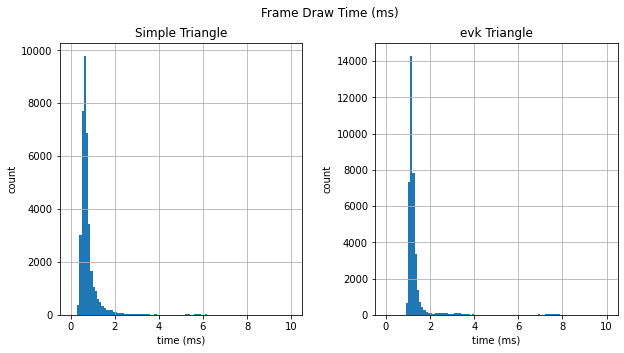

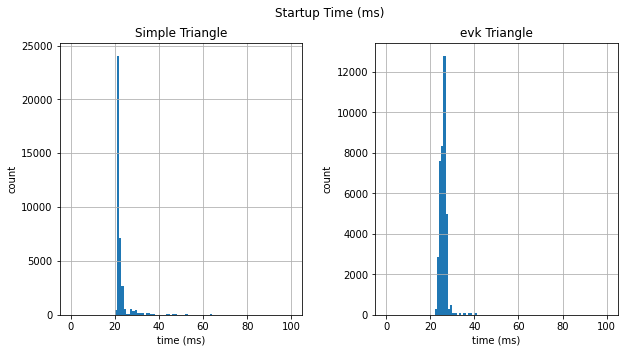

In [ ]:
t = pd.read_csv("triangle.txt")
m = pd.read_csv("multipass.txt")
o = pd.read_csv("obj.txt")
st = pd.read_csv("simple_triangle.csv")

triangle = Data(t,'evk Triangle')
multipass = Data(m,'evk Multipass')
obj = Data(o,'evk OBJ')
simple_triangle = Data(st,'Simple Triangle')

ALL_DATA_FRAMES = [triangle,multipass,obj,simple_triangle]

MAX_THREADS = 4

for data in ALL_DATA_FRAMES:
    df = data.df
    for i in range(1,MAX_THREADS+1):
        z=np.abs(stats.zscore(df.frame[df.numThreads==i]))
        df.drop(df.index[np.where(z>3)[0]], inplace=True)
        z=np.abs(stats.zscore(df.startup[df.numThreads==i]))
        df.drop(df.index[np.where(z>3)[0]], inplace=True)

def graph_per_thread(d, n, subtitle, minimum=0, maximum=100):
    x_label='time (ms)'
    y_label='count'
    
    df = d.df
    
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    fig.suptitle('Example {} {} Time (ms) - {} Vertices'.format(d.title, subtitle, df.numVerts.iloc[0]))
    for i in range(1,5):
        df[df.numThreads==i].hist(n,bins=100,ax=ax[i-1],range=[minimum,maximum])
        ax[i-1].set_xlabel(x_label)
        ax[i-1].set_ylabel(y_label)
        ax[i-1].set_title('{} threads'.format(i))
    plt.show()
    
def graph(simple, evk, n, title, minimum=0, maximum=100):
    x_label='time (ms)'
    y_label='count'
    
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    fig.suptitle('{} Time (ms)'.format(title))
    
    def g(d, i):
        df = d.df
        df.hist(n,bins=100,ax=ax[i],range=[minimum,maximum])
        ax[i].set_xlabel(x_label)
        ax[i].set_ylabel(y_label)
        ax[i].set_title(d.title)
    
    g(simple,0)
    g(evk,1)
    plt.show()
    
graph(simple_triangle, triangle, 'frame', 'Frame Draw', 0, 10)
graph(simple_triangle, triangle, 'startup', 'Startup', 0, 100)

for data in ALL_DATA_FRAMES:
    graph_per_thread(data, 'frame', 'Frame Draw', 0, 30)
    
for data in ALL_DATA_FRAMES:
    graph_per_thread(data, 'startup', 'Startup', 0, 200)
    graph(data, 'startup', 'Startup', 0, 200)